In [7]:
# To make sure all of the correct libraries are installed, import each module and print the version number
import sys
import numpy as np
import sklearn
import pandas as pd
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Pandas: {}'.format(pd.__version__))

Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Numpy: 2.0.2
Sklearn: 1.6.1
Pandas: 2.2.2


In [8]:
# Load dataset from url
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
names = ['Class', 'id', 'Sequence']
data = pd.read_csv(url, names = names)

In [9]:
print(data.iloc[0])

Class                                                       +
id                                                        S10
Sequence    \t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
Name: 0, dtype: object


In [10]:
print(data.iloc[5])

Class                                                       +
id                                                     MALEFG
Sequence    \taggggcaaggaggatggaaagaggttgccgtataaagaaactag...
Name: 5, dtype: object


In [11]:
# Building our Dataset by creating a custom Pandas DataFrame
# Each column in a DataFrame is called a Series. Lets start by making a series␣for each column.
classes = data.loc[:, 'Class']
print(classes[:5])

0    +
1    +
2    +
3    +
4    +
Name: Class, dtype: object


In [12]:
# generate list of DNA sequences
sequences = list(data.loc[:, 'Sequence'])
dataset = {}
# loop through sequences and split into individual nucleotides
for i, seq in enumerate(sequences):
    # split into nucleotides, remove tab characters
    nucleotides = list(seq)
    nucleotides = [x for x in nucleotides if x != '\t'] # Remove tab characters
    # append class assignment
    nucleotides.append(classes[i]) # Add the class label to the end of the nucleotide list
    # add to dataset
    dataset[i] = nucleotides # Add the list of nucleotides and class to the dataset dictionary

In [13]:
print(dataset[0])

['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g', 't', '+']


In [14]:
# Turn dataset into pandas DataFrame
# The dictionary is structured such that keys are row indices and values are lists of column values.
# This will result in a DataFrame where rows are sequences and columns are nucleotide positions + class.
dframe = pd.DataFrame(dataset)
print(dframe)

   0   1   2   3   4   5   6   7   8   9    ... 96  97  98  99  100 101 102  \
0    t   t   g   a   t   a   c   t   c   t  ...   c   c   t   a   g   c   g   
1    a   g   t   a   c   g   a   t   g   t  ...   c   g   a   g   a   c   t   
2    c   c   a   t   g   g   g   t   a   t  ...   g   c   t   a   g   t   a   
3    t   t   c   t   a   g   g   c   c   t  ...   a   t   g   g   a   c   t   
4    a   a   t   g   t   g   g   t   t   a  ...   g   a   a   g   g   a   t   
5    g   t   a   t   a   c   g   a   t   a  ...   t   g   c   g   c   a   c   
6    c   c   g   g   a   a   g   c   a   a  ...   a   g   c   t   a   t   t   
7    a   c   a   a   t   a   t   a   a   t  ...   g   a   g   g   t   g   c   
8    a   t   g   t   t   g   g   a   t   t  ...   a   c   a   t   g   g   a   
9    t   g   a   g   a   g   g   a   a   t  ...   c   t   a   a   t   c   a   
10   a   a   a   t   a   a   a   a   t   c  ...   c   t   c   c   c   c   c   
11   c   c   c   g   c   g   g   c   a   c  ...   c 

In [15]:
# transpose the DataFrame
# Transposing the DataFrame makes each sequence a row and each position (nucleotide or class) a column,
# which is a more standard format for machine learning datasets.
df = dframe.transpose()
print(df.iloc[:5])

  0  1  2  3  4  5  6  7  8  9   ... 48 49 50 51 52 53 54 55 56 57
0  t  a  c  t  a  g  c  a  a  t  ...  g  c  t  t  g  t  c  g  t  +
1  t  g  c  t  a  t  c  c  t  g  ...  c  a  t  c  g  c  c  a  a  +
2  g  t  a  c  t  a  g  a  g  a  ...  c  a  c  c  c  g  g  c  g  +
3  a  a  t  t  g  t  g  a  t  g  ...  a  a  c  a  a  a  c  t  c  +
4  t  c  g  a  t  a  a  t  t  a  ...  c  c  g  t  g  g  t  a  g  +

[5 rows x 58 columns]


In [16]:
# for clarity, lets rename the last dataframe column to class
df.rename(columns = {57: 'Class'}, inplace = True)
print(df.iloc[:5])

   0  1  2  3  4  5  6  7  8  9  ... 48 49 50 51 52 53 54 55 56 Class
0  t  a  c  t  a  g  c  a  a  t  ...  g  c  t  t  g  t  c  g  t     +
1  t  g  c  t  a  t  c  c  t  g  ...  c  a  t  c  g  c  c  a  a     +
2  g  t  a  c  t  a  g  a  g  a  ...  c  a  c  c  c  g  g  c  g     +
3  a  a  t  t  g  t  g  a  t  g  ...  a  a  c  a  a  a  c  t  c     +
4  t  c  g  a  t  a  a  t  t  a  ...  c  c  g  t  g  g  t  a  g     +

[5 rows x 58 columns]


In [17]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
count,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
unique,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,2
top,t,a,a,c,a,a,a,a,a,a,...,c,c,c,t,t,c,c,t,t,+
freq,38,34,30,30,36,42,38,34,33,36,...,36,42,31,33,35,32,29,29,34,53


In [18]:
# desribe does not tell us enough information since the attributes are t ext.␣Lets record value counts for each sequence
series = []
for name in df.columns:
  series.append(df[name].value_counts())
  info = pd.DataFrame(series)
  details = info.transpose()
  print(details)

   count
0       
t     38
c     27
a     26
g     15
   count  count
t     38     26
c     27     22
a     26     34
g     15     24
   count  count  count
t     38     26     27
c     27     22     21
a     26     34     30
g     15     24     28
   count  count  count  count
t     38     26     27     26
c     27     22     21     30
a     26     34     30     22
g     15     24     28     28
   count  count  count  count  count
t     38     26     27     26     22
c     27     22     21     30     19
a     26     34     30     22     36
g     15     24     28     28     29
   count  count  count  count  count  count
t     38     26     27     26     22     24
c     27     22     21     30     19     18
a     26     34     30     22     36     42
g     15     24     28     28     29     22
   count  count  count  count  count  count  count
t     38     26     27     26     22     24     30
c     27     22     21     30     19     18     21
a     26     34     30     22     36     42

In [19]:
# Unfortunately, we can't run machine learning algorithms on the data in 'String' formats. As a result, we need to switch
# it to numerical data. This can easily be accomplished using the pd.get_dummies() function.
# pd.get_dummies performs one-hot encoding, converting categorical variables into a numerical representation.
# Create a numerical representation of the DataFrame using one-hot encoding and display the first 5 rows.
numerical_df = pd.get_dummies(df)
numerical_df.iloc[:5]

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,False,False,False,True,True,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
1,False,False,False,True,False,False,True,False,False,True,...,True,False,False,False,True,False,False,False,True,False
2,False,False,True,False,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
4,False,False,False,True,False,True,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False


In [20]:
numerical_df.iloc[:60]

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,False,False,False,True,True,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
1,False,False,False,True,False,False,True,False,False,True,...,True,False,False,False,True,False,False,False,True,False
2,False,False,True,False,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
4,False,False,False,True,False,True,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False
5,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,True,False
6,False,True,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
7,False,False,False,True,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
8,False,True,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,True,True,False
9,False,False,False,True,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False


In [22]:
df = numerical_df.drop(columns=['Class_-'])
df.rename(columns = {'Class_+': 'Class'}, inplace = True)
print(df.iloc[:5])

     0_a    0_c    0_g    0_t    1_a    1_c    1_g    1_t    2_a    2_c  ...  \
0  False  False  False   True   True  False  False  False  False   True  ...   
1  False  False  False   True  False  False   True  False  False   True  ...   
2  False  False   True  False  False  False  False   True   True  False  ...   
3   True  False  False  False   True  False  False  False  False  False  ...   
4  False  False  False   True  False   True  False  False  False  False  ...   

    54_t   55_a   55_c   55_g   55_t   56_a   56_c   56_g   56_t  Class  
0  False  False  False   True  False  False  False  False   True   True  
1  False   True  False  False  False   True  False  False  False   True  
2  False  False   True  False  False  False  False   True  False   True  
3  False  False  False  False   True  False   True  False  False   True  
4   True   True  False  False  False  False  False   True  False   True  

[5 rows x 229 columns]


In [23]:
# Separate features (x) and target (y)
x = df.drop(columns='Class') # Features are all columns except 'Class'
y = df['Class'] # Target is the 'Class' column

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing, and 80% for training.
# random_state=42 ensures reproducibility of the split.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the shape of the feature DataFrame (number of rows, number of columns)
x.shape

(106, 228)

In [24]:
#Train and evaluate models
models_with_names = {
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(max_iter=1000),
    'DT': DecisionTreeClassifier(),
    'AD': AdaBoostClassifier(),
    'GNB': GaussianNB(),
    'SVM-Linear': SVC(kernel='linear'),
    'SVM-RBF': SVC(kernel='rbf'),
    'SVM-Sigmoid': SVC(kernel='sigmoid')}

Evaluating Support Vector Machine (SVM) - Linear Kernel...

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.73      0.84        11
        True       0.79      1.00      0.88        11

    accuracy                           0.86        22
   macro avg       0.89      0.86      0.86        22
weighted avg       0.89      0.86      0.86        22


Accuracy Score: 0.8636


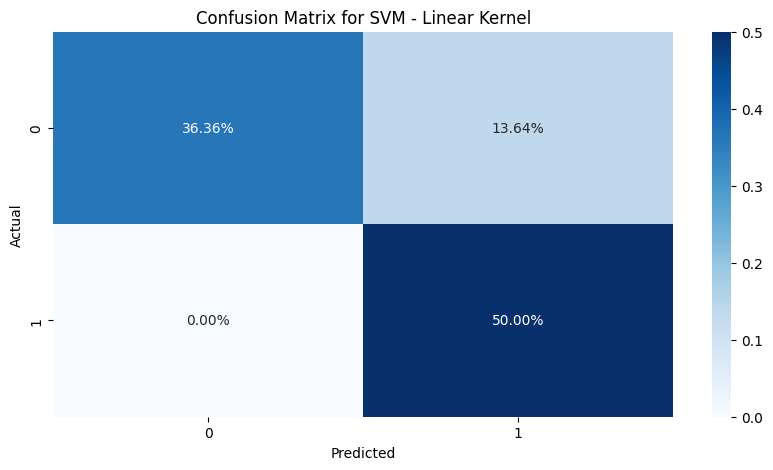

In [25]:
# Support Vector Machine (SVM) - Linear Kernel
print("Evaluating Support Vector Machine (SVM) - Linear Kernel...")
# Create model instance with linear kernel
model = SVC(kernel='linear')
# Fit the model using the training data
model.fit(x_train, y_train)
# Make predictions on the test data
predictions = model.predict(x_test)
# Print classification report to show precision, recall, f1-score, and support
print("\nClassification Report:")
print(classification_report(y_test, predictions))
# Print accuracy score
print(f"\nAccuracy Score: {accuracy_score(y_test, predictions):.4f}")
# Create and display confusion matrix as a heatmap
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,5))
# Use percentages for annotation and a Blues color map
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix for SVM - Linear Kernel')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Evaluating Support Vector Machine (SVM) - RBF Kernel...

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.82      0.90        11
        True       0.85      1.00      0.92        11

    accuracy                           0.91        22
   macro avg       0.92      0.91      0.91        22
weighted avg       0.92      0.91      0.91        22


Accuracy Score: 0.9091


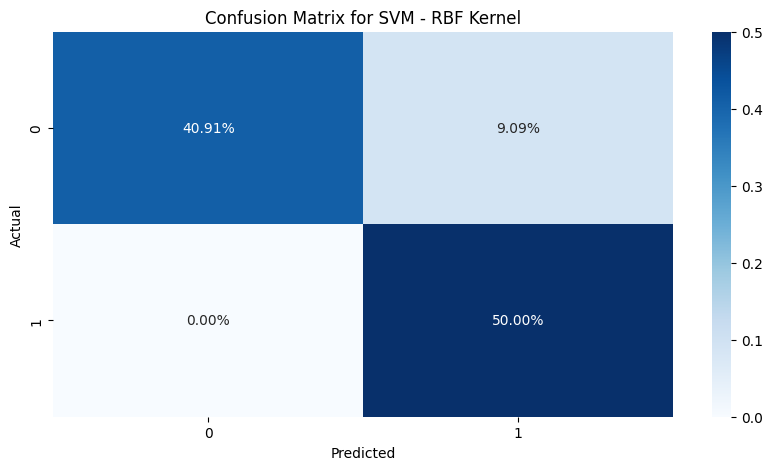

In [26]:
# Support Vector Machine (SVM) - RBF Kernel
print("Evaluating Support Vector Machine (SVM) - RBF Kernel...")
# Create model instance with RBF kernel
model = SVC(kernel='rbf')
# Fit the model using the training data
model.fit(x_train, y_train)
# Make predictions on the test data
predictions = model.predict(x_test)
# Print classification report to show precision, recall, f1-score, and support
print("\nClassification Report:")
print(classification_report(y_test, predictions))
# Print accuracy score
print(f"\nAccuracy Score: {accuracy_score(y_test, predictions):.4f}")
# Create and display confusion matrix as a heatmap
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,5))
# Use percentages for annotation and a Blues color map
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix for SVM - RBF Kernel')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Evaluating Support Vector Machine (SVM) - Sigmoid Kernel...

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.82      0.90        11
        True       0.85      1.00      0.92        11

    accuracy                           0.91        22
   macro avg       0.92      0.91      0.91        22
weighted avg       0.92      0.91      0.91        22


Accuracy Score: 0.9091


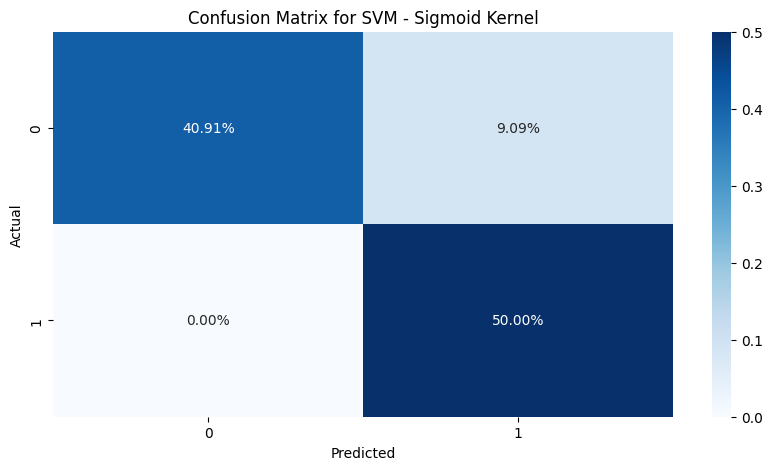

In [27]:
# Support Vector Machine (SVM) - Sigmoid Kernel
print("Evaluating Support Vector Machine (SVM) - Sigmoid Kernel...")
# Create model instance with Sigmoid kernel
model = SVC(kernel='sigmoid')
# Fit the model using the training data
model.fit(x_train, y_train)
# Make predictions on the test data
predictions = model.predict(x_test)
# Print classification report to show precision, recall, f1-score, and support
print("\nClassification Report:")
print(classification_report(y_test, predictions))
# Print accuracy score
print(f"\nAccuracy Score: {accuracy_score(y_test, predictions):.4f}")
# Create and display confusion matrix as a heatmap
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,5))
# Use percentages for annotation and a Blues color map
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix for SVM - Sigmoid Kernel')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Evaluating K-Nearest Neighbors (KNN)...

Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.45      0.59        11
        True       0.62      0.91      0.74        11

    accuracy                           0.68        22
   macro avg       0.73      0.68      0.66        22
weighted avg       0.73      0.68      0.66        22


Accuracy Score: 0.6818


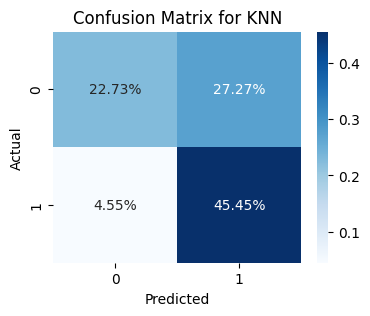

In [28]:
# K-Nearest Neighbors (KNN)
print("Evaluating K-Nearest Neighbors (KNN)...")
# Create model instance
model = KNeighborsClassifier()
# Fit the model using the training data
model.fit(x_train, y_train)
# Make predictions on the test data
predictions = model.predict(x_test)
# Print classification report to show precision, recall, f1-score, and support
print("\nClassification Report:")
print(classification_report(y_test, predictions))
# Print accuracy score
print(f"\nAccuracy Score: {accuracy_score(y_test, predictions):.4f}")
# Create and display confusion matrix as a heatmap
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4,3))
# Use percentages for annotation and a Blues color map
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Evaluating Multi-Layer Perceptron (MLP)...

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.73      0.84        11
        True       0.79      1.00      0.88        11

    accuracy                           0.86        22
   macro avg       0.89      0.86      0.86        22
weighted avg       0.89      0.86      0.86        22


Accuracy Score: 0.8636


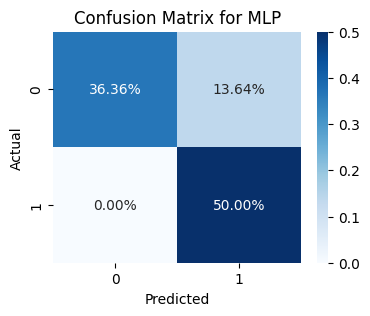

In [29]:
# Multi-Layer Perceptron (MLP)
print("Evaluating Multi-Layer Perceptron (MLP)...")
# Create model instance
model = MLPClassifier(max_iter=1000)
# Fit the model using the training data
model.fit(x_train, y_train)
# Make predictions on the test data
predictions = model.predict(x_test)
# Print classification report to show precision, recall, f1-score, and support
print("\nClassification Report:")
print(classification_report(y_test, predictions))
# Print accuracy score
print(f"\nAccuracy Score: {accuracy_score(y_test, predictions):.4f}")
# Create and display confusion matrix as a heatmap
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4,3))
# Use percentages for annotation and a Blues color map
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix for MLP')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Evaluating Decision Tree...

Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.36      0.50        11
        True       0.59      0.91      0.71        11

    accuracy                           0.64        22
   macro avg       0.69      0.64      0.61        22
weighted avg       0.69      0.64      0.61        22


Accuracy Score: 0.6364


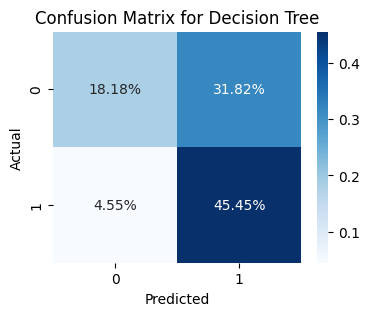

In [30]:
# Decision Tree
print("Evaluating Decision Tree...")
# Create model instance
model = DecisionTreeClassifier()
# Fit the model using the training data
model.fit(x_train, y_train)
# Make predictions on the test data
predictions = model.predict(x_test)
# Print classification report to show precision, recall, f1-score, and support
print("\nClassification Report:")
print(classification_report(y_test, predictions))
# Print accuracy score
print(f"\nAccuracy Score: {accuracy_score(y_test, predictions):.4f}")
# Create and display confusion matrix as a heatmap
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4,3))
# Use percentages for annotation and a Blues color map
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Evaluating AdaBoost Classifier...

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.91      0.95        11
        True       0.92      1.00      0.96        11

    accuracy                           0.95        22
   macro avg       0.96      0.95      0.95        22
weighted avg       0.96      0.95      0.95        22


Accuracy Score: 0.9545


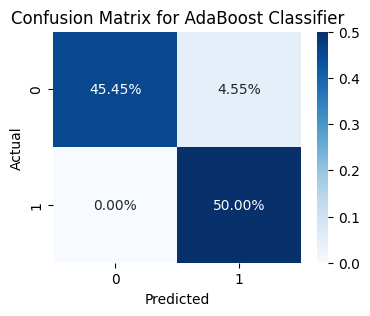

In [31]:
# AdaBoost Classifier
print("Evaluating AdaBoost Classifier...")
# Create model instance
model = AdaBoostClassifier()
# Fit the model using the training data
model.fit(x_train, y_train)
# Make predictions on the test data
predictions = model.predict(x_test)
# Print classification report to show precision, recall, f1-score, and support
print("\nClassification Report:")
print(classification_report(y_test, predictions))
# Print accuracy score
print(f"\nAccuracy Score: {accuracy_score(y_test, predictions):.4f}")
# Create and display confusion matrix as a heatmap
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4,3))
# Use percentages for annotation and a Blues color map
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Evaluating GaussianNB...

Classification Report:
              precision    recall  f1-score   support

       False       0.92      1.00      0.96        11
        True       1.00      0.91      0.95        11

    accuracy                           0.95        22
   macro avg       0.96      0.95      0.95        22
weighted avg       0.96      0.95      0.95        22


Accuracy Score: 0.9545


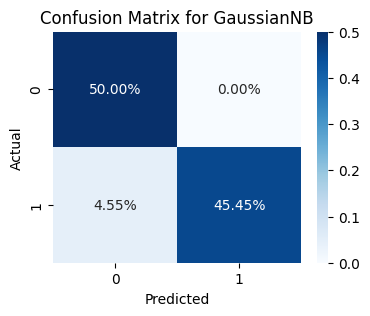

In [32]:
# GaussianNB
print("Evaluating GaussianNB...")
# Create model instance
model = GaussianNB()
# Fit the model using the training data
model.fit(x_train, y_train)
# Make predictions on the test data
predictions = model.predict(x_test)
# Print classification report to show precision, recall, f1-score, and support
print("\nClassification Report:")
print(classification_report(y_test, predictions))
# Print accuracy score
print(f"\nAccuracy Score: {accuracy_score(y_test, predictions):.4f}")
# Create and display confusion matrix as a heatmap
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4,3))
# Use percentages for annotation and a Blues color map
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix for GaussianNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Create a summary table comparing the performance metrics (accuracy, precision, recall, F1-score) of all models.

In [33]:
#Iterate through the models, train each one, make predictions, generate the classification report as a dictionary, extract the required metrics, and store them in a list.
results = []
for name, model in models_with_names.items():
    print(f"Evaluating {name}...")
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    # Generate classification report and get it as a dictionary for easy metric extraction
    report = classification_report(y_test, predictions, output_dict=True)

    # Extract key performance metrics for both classes and overall accuracy
    accuracy = report['accuracy']
    precision_false = report['False']['precision']
    recall_false = report['False']['recall']
    f1_false = report['False']['f1-score']
    precision_true = report['True']['precision']
    recall_true = report['True']['recall']
    f1_true = report['True']['f1-score']

    # Append the extracted metrics to the results list as a dictionary for each model
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision (False)': precision_false,
        'Recall (False)': recall_false,
        'F1-score (False)': f1_false,
        'Precision (True)': precision_true,
        'Recall (True)': recall_true,
        'F1-score (True)': f1_true
    })

print("Metrics extraction complete.")

Evaluating KNN...
Evaluating MLP...
Evaluating DT...
Evaluating AD...
Evaluating GNB...
Evaluating SVM-Linear...
Evaluating SVM-RBF...
Evaluating SVM-Sigmoid...
Metrics extraction complete.


In [34]:
#Convert the list of results into a pandas DataFrame to create the summary table.
summary_df = pd.DataFrame(results)
display(summary_df)

,Model,Accuracy,Precision (False),Recall (False),F1-score (False),Precision (True),Recall (True),F1-score (True)
0,KNN,0.681818,0.833333,0.454545,0.588235,0.625000,0.909091,0.740741
1,MLP,0.772727,0.875000,0.636364,0.736842,0.714286,0.909091,0.800000
2,DT,0.681818,0.833333,0.454545,0.588235,0.625000,0.909091,0.740741
3,AD,0.954545,1.000000,0.909091,0.952381,0.916667,1.000000,0.956522
4,GNB,0.954545,0.916667,1.000000,0.956522,1.000000,0.909091,0.952381
5,SVM-Linear,0.863636,1.000000,0.727273,0.842105,0.785714,1.000000,0.880000
6,SVM-RBF,0.909091,1.000000,0.818182,0.900000,0.846154,1.000000,0.916667
7,SVM-Sigmoid,0.909091,1.000000,0.818182,0.900000,0.846154,1.000000,0.916667


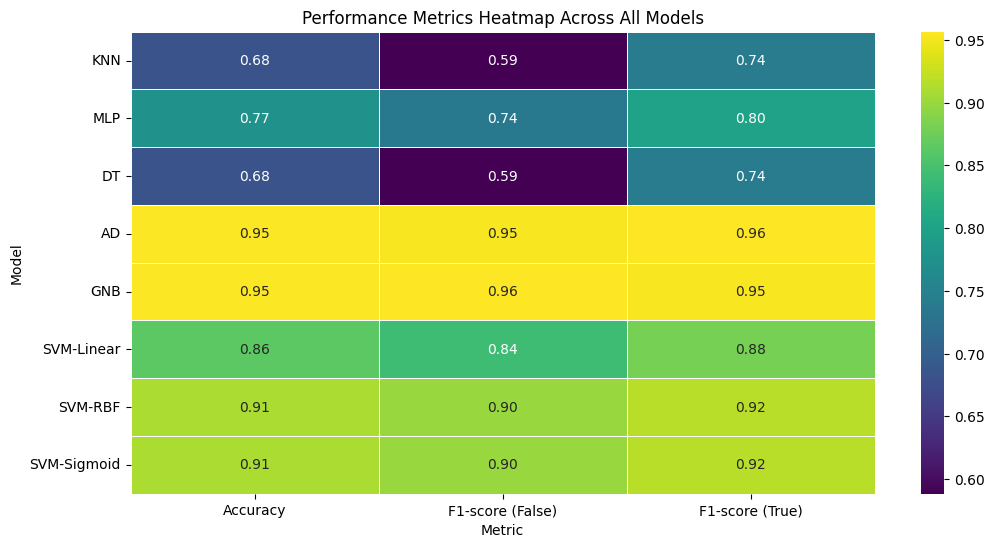

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the 'Model' column as the index for the heatmap
heatmap_df = summary_df.set_index('Model')

# Exclude 'Precision (False)', 'Recall (False)', 'F1-score (False)', 'Precision (True)', 'Recall (True)', 'F1-score (True)' as they are detailed in separate bar plots
# Instead, let's create a heatmap for the primary metrics for a concise view.
# Selecting only the overall accuracy and macro averages if available, or just the main f1 and precision metrics.
# For a single heatmap representing 'all models' performance across key metrics, we will choose a representative set.

# Let's focus on the overall Accuracy and the F1-scores for both classes for a balanced view.
metrics_for_heatmap = ['Accuracy', 'F1-score (False)', 'F1-score (True)']

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_df[metrics_for_heatmap], annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Performance Metrics Heatmap Across All Models')
plt.ylabel('Model')
plt.xlabel('Metric')
plt.yticks(rotation=0)
plt.show()

Based on the results, here's an analysis of the model performance:

**AdaBoost Classifier (AD)** and **GaussianNB (GNB)** achieved the highest accuracy of **0.9545.**



**AdaBoost Classifier (AD)** and **GaussianNB (GNB)** also show high precision, recall, and F1-scores for both classes, indicating a good balance between correctly identifying positive and negative cases. Specifically, GaussianNB has perfect recall for the 'False' class and AdaBoost has perfect recall for the 'True' class.



**SVM-Linear** and **MLP** also show good performance with an accuracy of **0.8636**, but their F1-scores for the 'False' class are lower compared to AdaBoost and GaussianNB.



**SVM-RBF** and **SVM-Sigmoid** have slightly higher accuracy **(0.9091)** than **SVM-Linear** and **MLP**, with strong performance on the 'True' class.
**KNN** and **Decision Tree (DT)** have the lowest accuracy and generally lower precision, recall, and F1-scores compared to the other models.



Conclusion:

Based on the overall performance metrics, particularly accuracy and balanced F1-scores for both classes, the **AdaBoost Classifier** and **GaussianNB** appear to be the best-performing models for this dataset. They demonstrate a strong ability to correctly classify both positive and negative cases.

# Model Performance Analysis and Visualization Summary

Based on the results and visualization of performance metrics, several machine learning models were evaluated for their classification effectiveness. The analysis integrates both numerical results and bar plot comparisons to provide a comprehensive performance overview.

## Accuracy

The AdaBoost Classifier (AD) and Gaussian Naive Bayes (GNB) achieved the highest accuracy of 0.9545, as evident from their dominant bars in the accuracy plot. SVM models with RBF and Sigmoid kernels followed closely with an accuracy of 0.9091, while the SVM-Linear and MLP models achieved 0.8636. K-Nearest Neighbors (KNN) and Decision Tree (DT) models exhibited the lowest accuracy among all tested algorithms.

## Precision, Recall, and F1-Score (False Class)

For the 'False' class, GaussianNB demonstrated perfect recall, meaning it correctly identified all negative cases. AdaBoost, SVM-RBF, and SVM-Sigmoid also showed strong recall performance. In terms of precision, most models—particularly MLP, AdaBoost, and SVM variants—achieved near-perfect precision, while KNN and DT lagged behind. The F1-score for this class further confirmed that GaussianNB and AdaBoost effectively balanced precision and recall, outperforming the rest.

## Precision, Recall, and F1-Score (True Class)

AdaBoost achieved perfect recall for the ‘True’ class, while GaussianNB, SVM, and MLP models also performed strongly with high recall values. Both AdaBoost and GaussianNB showed the highest precision for the 'True' class, emphasizing their reliability in correctly identifying positive predictions. Correspondingly, they achieved the top F1-scores for this class, indicating an optimal trade-off between precision and recall. The SVM-RBF and SVM-Sigmoid models followed closely, while KNN and DT again showed lower consistency across metrics.

## Visual Insights

Bar plots of the performance metrics reinforced the numerical findings. The AdaBoost Classifier and GaussianNB consistently show the highest bars across most metrics, particularly for overall accuracy and balanced F1-scores for both classes. The SVM models (RBF and Sigmoid) also perform well, especially in terms of accuracy and recall for the 'True' class. The KNN and Decision Tree models generally have lower bars across all metrics, indicating weaker performance on this dataset compared to the other models.

## Conclusion:

Based on the overall performance metrics, particularly accuracy and balanced F1-scores for both classes, the **AdaBoost Classifier** and **GaussianNB** appear to be the best-performing models for this dataset. They demonstrate a strong ability to correctly classify both positive and negative cases.